In [1]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from modules.gradcam import GradCAM

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
base_model = load_model('models/base_cnn')
vgg_model = load_model('models/vgg')

In [3]:
base_gcam = GradCAM(base_model)
vgg_gcam = GradCAM(vgg_model)

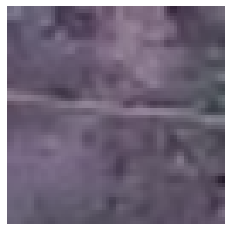

In [4]:
# Load example image
image = cv2.imread('data/test/images/00a36d4d6d152404670276fc983273bc.jpg')

resized_image = cv2.resize(image, (image.shape[1] * 2, image.shape[0] * 2))
plt.axis('off')
plt.imshow(resized_image, cmap='gray')

In [5]:
# Prep image for gradCam
input_image = img_to_array(image)
input_image = np.expand_dims(input_image, axis=0)

In [6]:
# generate heatmaps
base_heatmap = base_gcam.compute_heatmap(input_image)
vgg_heatmap = vgg_gcam.compute_heatmap(input_image)

In [7]:
# Overlay heatmaps
base_heatmap = cv2.resize(base_heatmap, (resized_image.shape[1], resized_image.shape[0]))
vgg_heatmap = cv2.resize(vgg_heatmap, (resized_image.shape[1], resized_image.shape[0]))

(base_heatmap, base_overlay) = base_gcam.overlay_heatmap(base_heatmap, resized_image)
(vgg_heatmap, vgg_overlay) = vgg_gcam.overlay_heatmap(vgg_heatmap, resized_image)

(-0.5, 63.5, 63.5, -0.5)

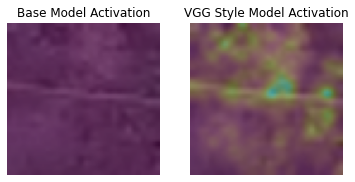

In [8]:
fig, axes = plt.subplots(1, 2)

axes[0].imshow(base_overlay)
axes[0].axis('off')
axes[0].set_title('Base Model Activation')

axes[1].set_title('VGG Style Model Activation')
axes[1].imshow(vgg_overlay)
axes[1].axis('off')